In [1]:
import os
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv("BitcoinHeistData.csv")
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2916697.0,2.014475e+03,2.257398e+00,2.011000e+03,2.013000e+03,2.014000e+03,2.016000e+03,2.018000e+03
day,2916697.0,1.814572e+02,1.040118e+02,1.000000e+00,9.200000e+01,1.810000e+02,2.710000e+02,3.650000e+02
length,2916697.0,4.500859e+01,5.898236e+01,0.000000e+00,2.000000e+00,8.000000e+00,1.080000e+02,1.440000e+02
weight,2916697.0,5.455192e-01,3.674255e+00,3.606469e-94,2.148438e-02,2.500000e-01,8.819482e-01,1.943749e+03
count,2916697.0,7.216446e+02,1.689676e+03,1.000000e+00,1.000000e+00,1.000000e+00,5.600000e+01,1.449700e+04
looped,2916697.0,2.385067e+02,9.663217e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.449600e+04
neighbors,2916697.0,2.206516e+00,1.791877e+01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.292000e+04
income,2916697.0,4.464889e+09,1.626860e+11,3.000000e+07,7.428559e+07,1.999985e+08,9.940000e+08,4.996440e+13


In [3]:
data.corr()

,year,day,length,weight,count,looped,neighbors,income
year,1.000000,-0.040307,0.163101,0.011827,0.285415,0.113164,-0.000876,-0.020535
day,-0.040307,1.000000,0.011919,0.000864,-0.002538,0.002566,0.000181,0.002628
length,0.163101,0.011919,1.000000,0.000228,0.703467,0.411609,0.031523,0.000488
weight,0.011827,0.000864,0.000228,1.000000,0.022313,0.061646,0.691963,0.069774
count,0.285415,-0.002538,0.703467,0.022313,1.000000,0.560370,0.025441,-0.003635
looped,0.113164,0.002566,0.411609,0.061646,0.560370,1.000000,0.052826,0.002551
neighbors,-0.000876,0.000181,0.031523,0.691963,0.025441,0.052826,1.000000,0.138966
income,-0.020535,0.002628,0.000488,0.069774,-0.003635,0.002551,0.138966,1.000000


In [56]:
os.mkdir('Images')

In [31]:
features = ["year", "day", "looped", "weight", "income"]
for x in features:
    plt.figure(figsize=(7,5))
    sns.boxplot(data[x],orient="v",width=0.5,palette="Set3")
    sns.despine()
    plt.title(f'Attribute {x.capitalize()} - Boxplot',pad=10.0)
    plt.ylabel(x,fontdict={'fontsize':12})
    plt.savefig(f'Images/BoxPlot-{x}.png')
    plt.show()

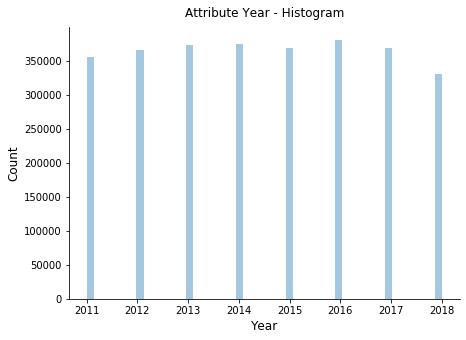

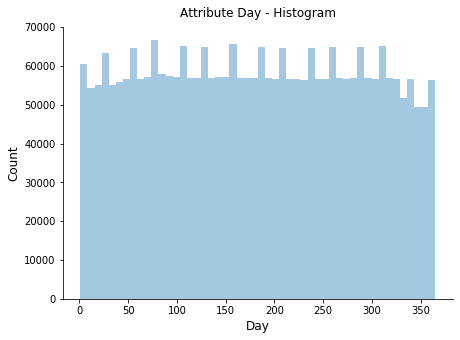

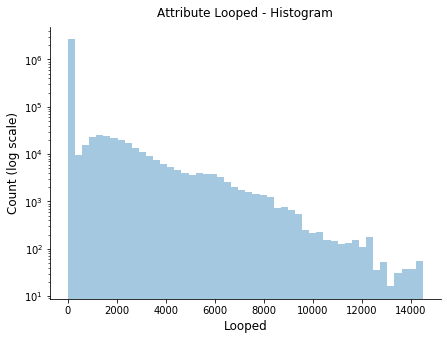

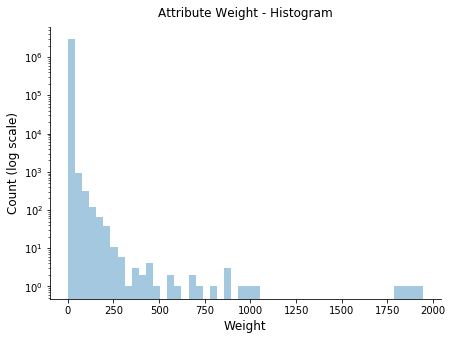

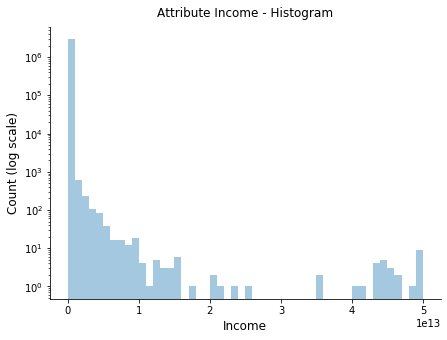

In [59]:
for x in features:
    plt.figure(figsize=(7,5))
    sns.distplot(data[x],kde=False)
    sns.despine()
    plt.xlabel(x.capitalize(),fontsize=12)
    if x in ['looped','weight','income']:
        plt.yscale('log')
        plt.ylabel('Count (log scale)',fontsize=12)
    else:
        plt.ylabel('Count',fontsize=12)
    plt.title(f'Attribute {x.capitalize()} - Histogram',pad=10.0)
    plt.savefig(f'Images/Histogram-{x}.png')
    plt.show()

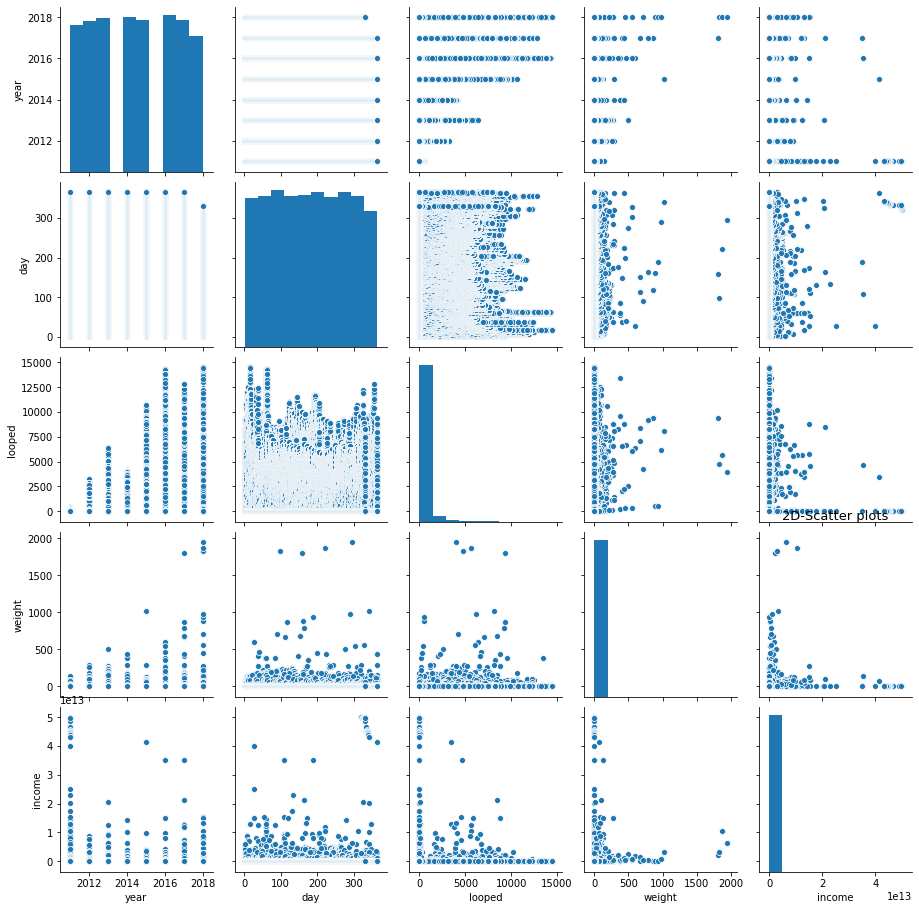

In [24]:
sns.pairplot(data[features],palette="Set3")
plt.title("2D-Scatter plots",fontsize=13,pad=12.0)
plt.savefig('Images/pairplots.png')

In [33]:
features = list(itertools.combinations(features,3))

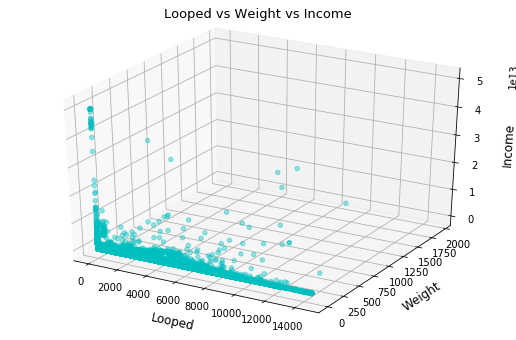

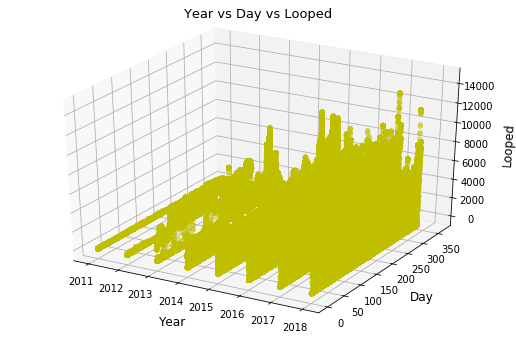

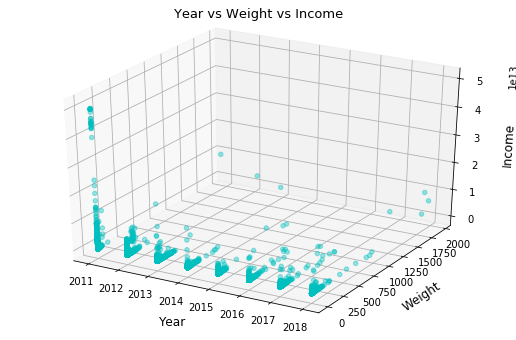

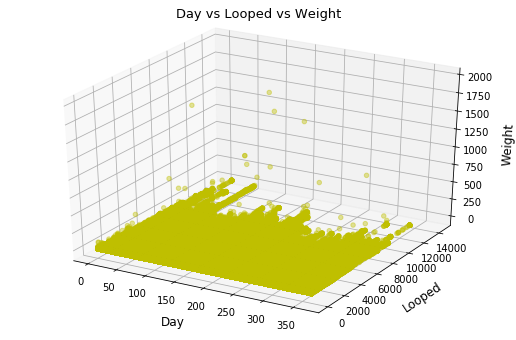

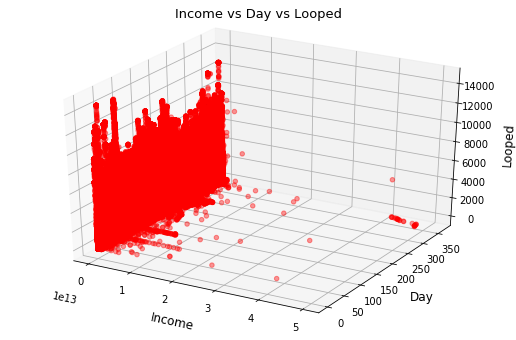

In [46]:
for x, y, z in features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[x], data[y], data[z], c=np.random.choice(['r','y','c']),marker='o',alpha=0.4)
    ax.set_xlabel(x.capitalize(),fontdict={"fontsize":12},labelpad=10.0,)
    ax.set_ylabel(y.capitalize(),fontdict={"fontsize":12},labelpad=10.0)
    ax.set_zlabel(z.capitalize(),fontdict={"fontsize":12},labelpad=10.0)
    plt.title(f'{x.capitalize()} vs {y.capitalize()} vs {z.capitalize()}',fontdict={"fontsize":13},pad=15.0)
    plt.savefig(f'Images/scatter3d-{x}-{y}-{z}.png')
    plt.show()